Purpose: Ensures TensorFlow runs efficiently using GPU.


In [1]:
import tensorflow as tf

print("Available devices:", tf.config.list_physical_devices('GPU'))
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
        print("GPU acceleration enabled!")
    except RuntimeError as e:
        print(e)


Available devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU acceleration enabled!


Prepares data for MLP & CNN models.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values

# Reshape for CNN (add channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8793 - loss: 0.4248 - val_accuracy: 0.9616 - val_loss: 0.1286
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9647 - loss: 0.1170 - val_accuracy: 0.9676 - val_loss: 0.0984
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9765 - loss: 0.0809 - val_accuracy: 0.9732 - val_loss: 0.0879
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9843 - loss: 0.0531 - val_accuracy: 0.9760 - val_loss: 0.0804
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9871 - loss: 0.0441 - val_accuracy: 0.9778 - val_loss: 0.0715
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9896 - loss: 0.0341 - val_accuracy: 0.9773 - val_loss: 0.0735
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9917 - loss: 0.0288 - val_accuracy: 0.9791 - val_loss: 0.0731
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9937 - loss: 0.0209 -

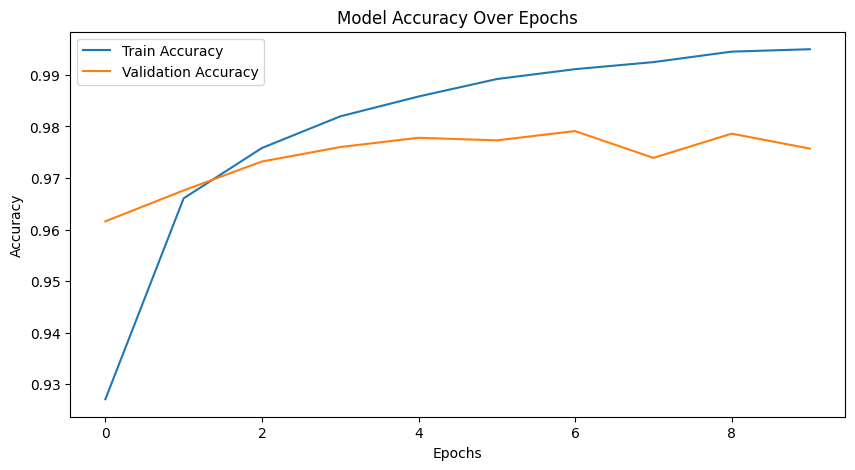

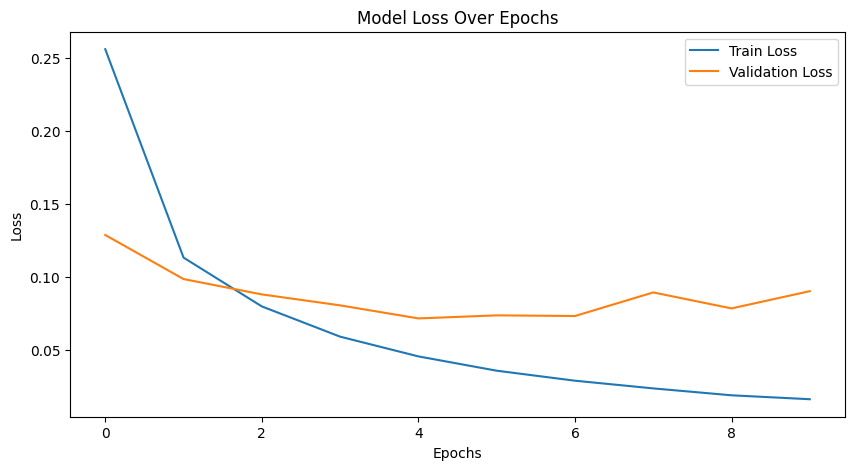

In [4]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')
plt.show()

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss Over Epochs')
plt.show()


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8689 - loss: 0.4174 - val_accuracy: 0.9841 - val_loss: 0.0500
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9744 - loss: 0.0856 - val_accuracy: 0.9866 - val_loss: 0.0406
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9823 - loss: 0.0573 - val_accuracy: 0.9893 - val_loss: 0.0310
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9871 - loss: 0.0441 - val_accuracy: 0.9915 - val_loss: 0.0260
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9895 - loss: 0.0343 - val_accuracy: 0.9928 - val_loss: 0.0239
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9901 - loss: 0.0308 - val_accuracy: 0.9914 - val_loss: 0.0251
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9923 - loss: 0.0279 - val_accuracy: 0.9893 - val_loss: 0.0313
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9926 - loss: 0.0

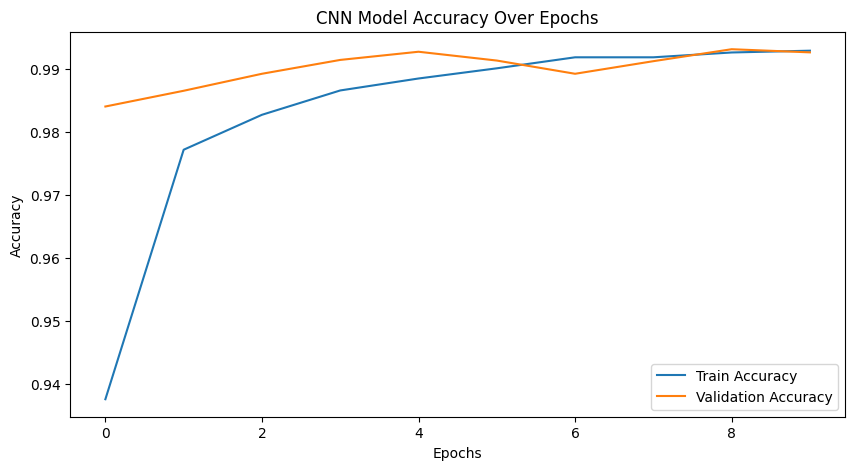

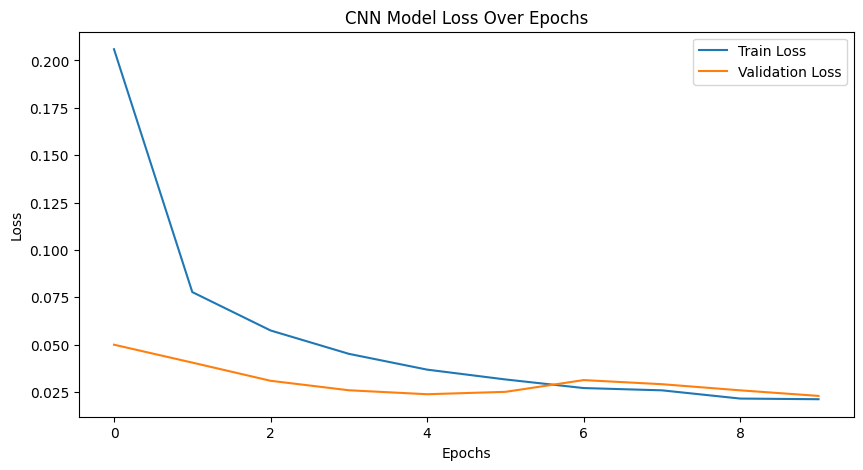

In [6]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Model Accuracy Over Epochs')
plt.show()

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('CNN Model Loss Over Epochs')
plt.show()


Improves accuracy by exposing model to varied images.


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

datagen.fit(x_train)

history_aug = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                         epochs=10, validation_data=(x_test, y_test))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.9492 - loss: 0.1705 - val_accuracy: 0.9919 - val_loss: 0.0233
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9726 - loss: 0.0894 - val_accuracy: 0.9931 - val_loss: 0.0202
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.9764 - loss: 0.0751 - val_accuracy: 0.9931 - val_loss: 0.0212
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9786 - loss: 0.0712 - val_accuracy: 0.9944 - val_loss: 0.0153
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9799 - loss: 0.0670 - val_accuracy: 0.9946 - val_loss: 0.0177
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9801 - loss: 0.0664 - val_accuracy: 0.9930 - val_loss: 0.0216
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9831 - loss: 0.0563 - val_accuracy: 0.9936 - val_loss: 0.0199
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9833 - loss: 0.05

Optimizes training speed and improves accuracy.

In [8]:
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_schedule(epoch, lr):
    return lr * 0.95  # Reduce learning rate by 5% each epoch

lr_callback = LearningRateScheduler(lr_schedule)
history_lr = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[lr_callback])


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9922 - loss: 0.0256 - val_accuracy: 0.9947 - val_loss: 0.0137 - learning_rate: 9.5000e-04
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9945 - loss: 0.0177 - val_accuracy: 0.9946 - val_loss: 0.0183 - learning_rate: 9.0250e-04
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9959 - loss: 0.0134 - val_accuracy: 0.9931 - val_loss: 0.0252 - learning_rate: 8.5737e-04
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9964 - loss: 0.0113 - val_accuracy: 0.9948 - val_loss: 0.0196 - learning_rate: 8.1451e-04
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9965 - loss: 0.0115 - val_accuracy: 0.9949 - val_loss: 0.0204 - learning_rate: 7.7378e-04
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9969 - loss: 0.0089 - val_accuracy: 0.9950 - val_loss: 0.0233 - learning_rate: 7.3509e-04
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/s

To avoid retraining, save the trained model

In [9]:
model.save("/content/digit_recognition_model.h5")
print("Model saved successfully!")


Model saved successfully!


Later, reload for predictions

In [10]:
from tensorflow.keras.models import load_model
model = load_model("/content/digit_recognition_model.h5")


Saves model for future predictions.

Allows real-world testing using new images.

In [11]:
from google.colab import files
uploaded = files.upload()

import cv2
import numpy as np
from PIL import Image

# Load & preprocess image
image_path = list(uploaded.keys())[0]
img = Image.open(image_path).convert('L')
img = img.resize((28, 28))
img = np.array(img) / 255.0
img = img.reshape(1, 28, 28, 1)

prediction = model.predict(img)
predicted_digit = np.argmax(prediction)

print(f"Predicted digit: {predicted_digit}")


Saving RdEpj.png to RdEpj.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
Predicted digit: 6
